# Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
game = pd.read_csv('/content/Metacritic_games_of_all_time.csv')
game

,Unnamed: 0,title,release,platform,critic_score,user_score,developer,genre(s),rating
0,1,Portal 2,2011-04-19,Xbox 360,95.0,8.8,Valve Software,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",E10+
1,2,Metal Gear Solid V: The Phantom Pain,2015-09-01,Xbox One,95.0,7.5,Konami,"Modern,Modern,Action Adventure,Open-World",M
2,3,Red Dead Redemption,2010-05-18,Xbox 360,95.0,9,Rockstar Games,"Action,Action Adventure,Shooter,Historic,Histo...",M
3,4,Portal 2,2011-04-18,PC,95.0,9.1,Valve Software,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",E10+
4,5,The Last of Us Remastered,2014-07-29,PlayStation 4,95.0,9.2,SCEA,"Action Adventure,General,Modern",M
...,...,...,...,...,...,...,...,...,...
14661,18655,Things on Wheels,2010-05-12,Xbox 360,41.0,6,Focus Home Interactive,"Driving,Racing,Arcade,Arcade,Automobile",E
14662,18656,Rugby 18,2017-10-24,PlayStation 4,41.0,4.2,Bigben Interactive,"Sports,Team,Rugby",E
14663,18657,Legacy: Dark Shadows,2004-11-19,PC,41.0,3.7,Tri Synergy,"Adventure,3D,First-Person,Fantasy,Third-Person...",T
14664,18659,MotionSports Adrenaline,2011-11-01,Xbox 360,41.0,6.4,Ubisoft,"Sports,General,General",E


# Exploratory Data Analysis

In [3]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14666 entries, 0 to 14665
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14666 non-null  int64  
 1   title         14666 non-null  object 
 2   release       14666 non-null  object 
 3   platform      14666 non-null  object 
 4   critic_score  14659 non-null  float64
 5   user_score    14658 non-null  object 
 6   developer     14666 non-null  object 
 7   genre(s)      14666 non-null  object 
 8   rating        12616 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


In [4]:
game = game.rename(columns={'Unnamed: 0': 'game_id'})

In [5]:
print('Jumlah judul game: ', len(game.title.unique()))

Jumlah judul game:  9909


## Univariate Analyisis

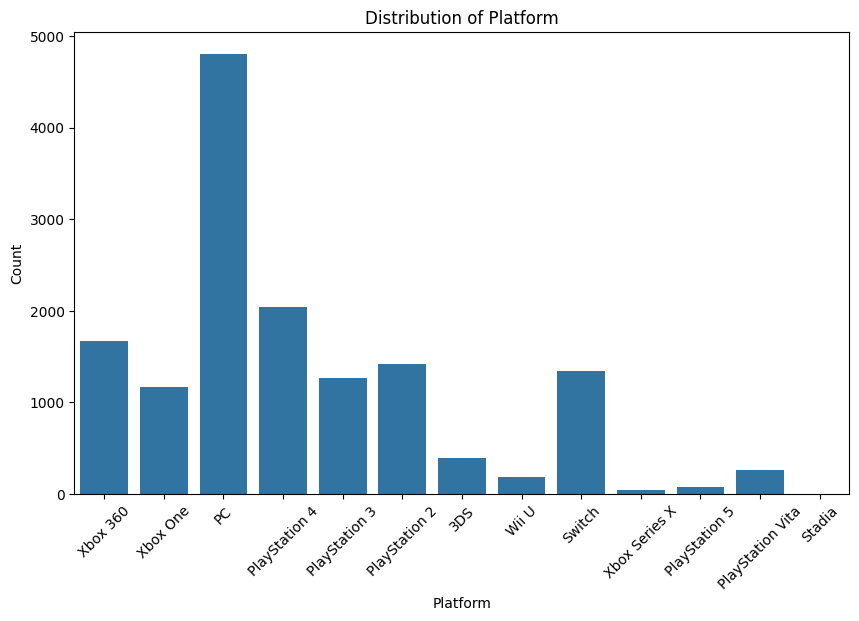

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='platform', data=game)
plt.title('Distribution of Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

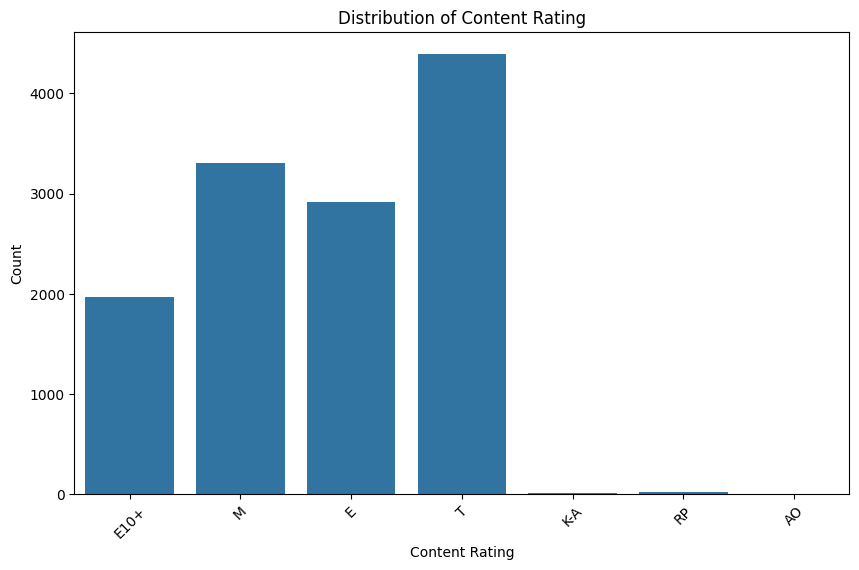

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=game)
plt.title('Distribution of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

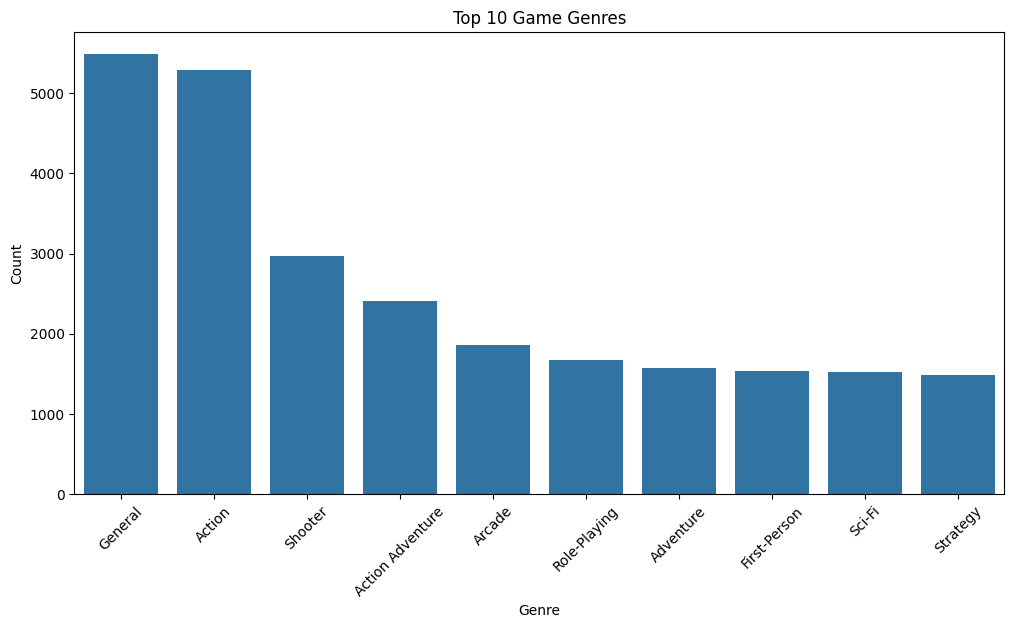

In [8]:
genre_counts = game['genre(s)'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

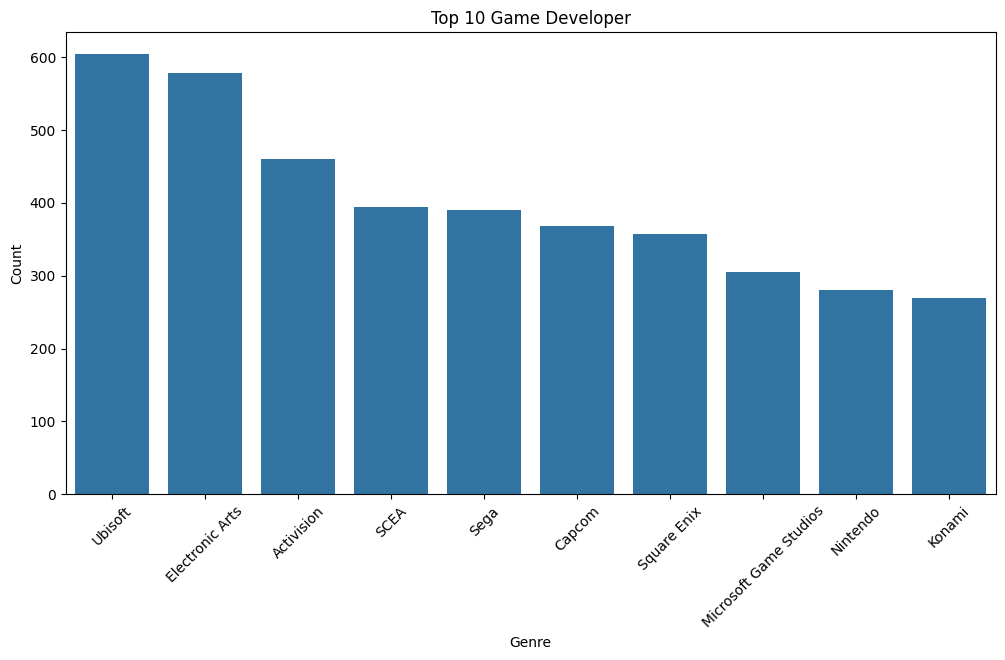

In [9]:
genre_counts = game['developer'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Game Developer')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

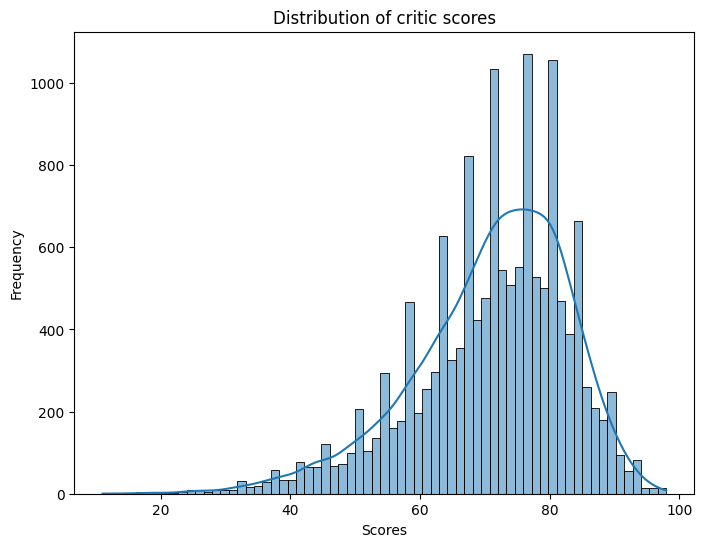

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(game['critic_score'].dropna(), kde=True)
plt.title('Distribution of critic scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

In [11]:
max_rating = game['critic_score'].max()
mean_rating = game['critic_score'].mean()
min_rating = game['critic_score'].min()

print(f"Max Rating: {max_rating}")
print(f"Mean Rating: {mean_rating}")
print(f"Min Rating: {min_rating}")

Max Rating: 98.0
Mean Rating: 70.97209905177706
Min Rating: 11.0


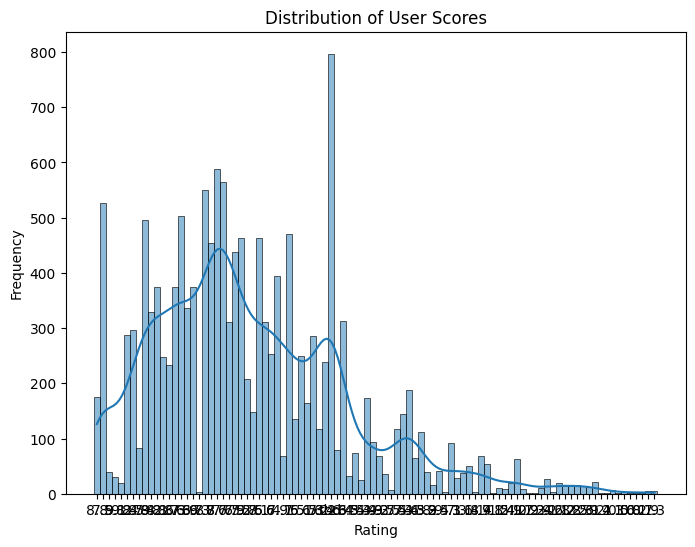

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(game['user_score'].dropna(), kde=True)
plt.title('Distribution of User Scores')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
print('User Score: ', game.user_score.unique())

User Score:  ['8.8' '7.5' '9' '9.1' '9.2' '8.4' '8.5' '8.9' '7.4' '8.2' '8.1' '8.6'
 '8.7' '8.3' '7.3' '6.6' '6.8' '9.3' '7.8' '8' '7.7' '7.6' '6.5' '7.9'
 '7.2' '5.8' '5.5' '7.1' '6.7' '6' '6.9' nan '4.1' '7' '5' '6.1' '5.7'
 '6.3' '5.2' '6.2' 'tbd' '4.6' '6.4' '3.5' '4.4' '3.3' '5.9' '4.9' '4.3'
 '3.7' '2.7' '5.4' '5.3' '5.6' '4.5' '4.8' '3.9' '2' '3.4' '9.7' '5.1' '3'
 '3.6' '3.8' '1.1' '4.7' '4' '9.8' '1.5' '1.4' '2.9' '4.2' '1.7' '0.9'
 '1.2' '2.4' '3.1' '9.6' '2.8' '2.2' '1.8' '2.5' '2.6' '2.1' '3.2' '9.4'
 '1' '2.3' '0.5' '1.6' '0.8' '0.2' '0.7' '1.9' '1.3']


In [14]:
top_10_uscore = game['user_score'].value_counts().nlargest(10)
top_10_uscore

,count
user_score,
tbd,797
7.7,589
7.6,564
7.8,550
7.5,526
7.3,503
7.4,496
7,470
7.1,463


# Data Preparation

## Kesalahan Tipe Data

In [15]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14666 entries, 0 to 14665
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       14666 non-null  int64  
 1   title         14666 non-null  object 
 2   release       14666 non-null  object 
 3   platform      14666 non-null  object 
 4   critic_score  14659 non-null  float64
 5   user_score    14658 non-null  object 
 6   developer     14666 non-null  object 
 7   genre(s)      14666 non-null  object 
 8   rating        12616 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ MB


In [16]:
game['user_score'] = pd.to_numeric(game['user_score'], errors='coerce')

print(game['user_score'].dtype)

float64


## Missing Value

In [17]:
game.isna().sum()

,0
game_id,0
title,0
release,0
platform,0
critic_score,7
user_score,805
developer,0
genre(s),0
rating,2050


In [18]:
nan_critic_score = game[game['critic_score'].isna()]
nan_critic_score

,game_id,title,release,platform,critic_score,user_score,developer,genre(s),rating
258,340,FEAR,2021-07-08,PC,NaN,NaN,Piece Of Voxel,"Action Adventure,Survival",NaN
7498,9325,Dracula Origin,2008-12-19,PC,NaN,NaN,Big Fish Games,"Adventure,General",NaN
7681,9558,No Mans Land,2017-09-15,PC,NaN,NaN,Selective Intuition,"Action,General",NaN
8766,10903,Yatagarasu: Attack on Cataclysm,2015-07-07,PC,NaN,NaN,"Nyu Media, Ltd.","Action,Fighting,2D",NaN
11852,14787,P.I.D.,2020-10-13,PC,NaN,NaN,AMDI Studios,"Strategy,General",NaN
12452,15572,Agatha Christie: The ABC Murders,2016-02-23,PC,NaN,NaN,Kalypso,"Adventure,General,Point-and-Click",NaN
13028,16355,Painkiller Redemption,2011-02-25,PC,NaN,NaN,THQ Nordic,"Action,Shooter,First-Person,Arcade",M


In [19]:
game.dropna(subset=['critic_score', 'user_score'], inplace=True)

In [20]:
rating = game[game['rating'].isna()]
rating

,game_id,title,release,platform,critic_score,user_score,developer,genre(s),rating
116,161,Spelunky 2,2020-09-29,PC,91.0,6.7,Mossmouth,"Action,Platformer,2D",NaN
123,169,Disco Elysium,2019-10-15,PC,91.0,8.4,ZA/UM,"Role-Playing,General",NaN
147,199,Galactic Civilizations II: Dark Avatar,2007-02-14,PC,91.0,7.8,Stardock,"Strategy,Turn-Based,Sci-Fi,Sci-Fi,4X",NaN
154,207,Dota 2,2013-07-09,PC,90.0,6.5,Valve Software,"General,Fantasy,MOBA,Strategy,Real-Time,MOBA",NaN
186,251,There is no game : Wrong dimension,2020-08-06,PC,89.0,8.8,Draw Me A Pixel,"Adventure,General,Point-and-Click",NaN
...,...,...,...,...,...,...,...,...,...
14494,18415,Dawn of Fear,2020-02-03,PlayStation 4,33.0,4.1,Gammera Nest,"Action Adventure,Survival",NaN
14519,18447,Eternity: The Last Unicorn,2019-03-05,PlayStation 4,36.0,4.0,1C Entertainment,"Role-Playing,Action RPG",NaN
14621,18596,Montague's Mount,2013-10-09,PC,39.0,5.0,Mastertronic,"Action Adventure,Horror,Horror",NaN
14650,18638,7554,2012-07-20,PC,41.0,7.3,Emobi Games,"Action,Shooter,Shooter,First-Person,Historic,A...",NaN


In [21]:
game.dropna(subset=['rating'], inplace=True)

In [22]:
game.shape

(12031, 9)

In [23]:
game.isna().sum()

,0
game_id,0
title,0
release,0
platform,0
critic_score,0
user_score,0
developer,0
genre(s),0
rating,0


## Duplikasi Data

In [24]:
game['title'].value_counts()

,count
title,
Resident Evil: Revelations,7
Final Fantasy X / X-2 HD Remaster,6
Resident Evil 5,6
Dragon's Dogma: Dark Arisen,6
Child of Light,6
...,...
"LEVEL 22, Gary's Misadventures",1
The 25th Ward: The Silver Case,1
Kromaia Omega,1


In [25]:
game_filtered = game[game['title'] == "Resident Evil: Revelations"]
game_filtered

,game_id,title,release,platform,critic_score,user_score,developer,genre(s),rating
731,913,Resident Evil: Revelations,2012-02-07,3DS,82.0,8.5,Capcom,"Action Adventure,Horror,Horror,Survival",M
1113,1365,Resident Evil: Revelations,2013-05-21,Wii U,80.0,7.8,Capcom,"Action Adventure,Horror,Horror,Survival",M
1603,1955,Resident Evil: Revelations,2013-05-20,PC,77.0,7.2,Capcom,"Action Adventure,Horror,Horror,Survival",M
1992,2421,Resident Evil: Revelations,2017-11-28,Switch,78.0,8.2,Capcom,"Action Adventure,Survival",M
7763,9663,Resident Evil: Revelations,2017-08-29,PlayStation 4,70.0,7.8,Capcom,"Action Adventure,Survival",M
9142,11358,Resident Evil: Revelations,2013-05-21,PlayStation 3,74.0,7.5,Capcom,"Action Adventure,Horror,Horror,Survival",M
9660,11980,Resident Evil: Revelations,2013-05-21,Xbox 360,75.0,7.7,Capcom,"Action Adventure,Horror,Horror,Survival",M


In [26]:
game = game[~game['title'].duplicated(keep='first')]

game['title'].value_counts()

,count
title,
Portal 2,1
The Next Big Thing,1
Another World,1
Push Me Pull You,1
Yomawari: Night Alone,1
...,...
GTR: FIA GT Racing Game,1
Forza Horizon,1
Shadow Hearts: Covenant,1


## Feature Engineering

In [27]:
rec_game = game[['game_id', 'title', 'genre(s)']]
rec_game.head()

,game_id,title,genre(s)
0,1,Portal 2,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci..."
1,2,Metal Gear Solid V: The Phantom Pain,"Modern,Modern,Action Adventure,Open-World"
2,3,Red Dead Redemption,"Action,Action Adventure,Shooter,Historic,Histo..."
4,5,The Last of Us Remastered,"Action Adventure,General,Modern"
5,6,Persona 5 Royal,"Role-Playing,Japanese-Style"


In [28]:
rec_game.loc[rec_game['genre(s)'].str.contains('Sci-Fi', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Sci-Fi', 'scifi')
rec_game.loc[rec_game['genre(s)'].str.contains('Open-World', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Open-World', 'openworld')
rec_game.loc[rec_game['genre(s)'].str.contains('Third-Person', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Third-Person', 'thirdperson')
rec_game.loc[rec_game['genre(s)'].str.contains('First-Person', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('First-Person', 'firstperson')
rec_game.loc[rec_game['genre(s)'].str.contains('Role-Playing', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Role-Playing', 'roleplaying')
rec_game.loc[rec_game['genre(s)'].str.contains('GT / Street', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('GT / Street', 'gtstreet')
rec_game.loc[rec_game['genre(s)'].str.contains('Turn-Based', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Turn-Based', 'turnbased')
rec_game.loc[rec_game['genre(s)'].str.contains('Western-Style', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Western-Style', 'westernstyle')
rec_game.loc[rec_game['genre(s)'].str.contains('PC-style', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('PC-style', 'pcstyle')
rec_game.loc[rec_game['genre(s)'].str.contains('Japanese-Style', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Japanese-Style', 'japanstyle')
rec_game.loc[rec_game['genre(s)'].str.contains('Rally / Offroad', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Rally / Offroad', 'rally')
rec_game.loc[rec_game['genre(s)'].str.contains('Skate / Skateboard', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Skate / Skateboard', 'skateboard')
rec_game.loc[rec_game['genre(s)'].str.contains('Point-and-Click', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Point-and-Click', 'pointandclick')
rec_game.loc[rec_game['genre(s)'].str.contains('Turn-Based', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Turn-Based', 'turnbased')
rec_game.loc[rec_game['genre(s)'].str.contains('Top-Down', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Top-Down', 'topdown')
rec_game.loc[rec_game['genre(s)'].str.contains('Party / Minigame', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Party / Minigame', 'minigame')
rec_game.loc[rec_game['genre(s)'].str.contains('Board / Card Game', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Board / Card Game', 'cardgame')
rec_game.loc[rec_game['genre(s)'].str.contains('Real-Time', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Real-Time', 'realtime')
rec_game.loc[rec_game['genre(s)'].str.contains('Exercise / Fitness', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Exercise / Fitness', 'fitness')
rec_game.loc[rec_game['genre(s)'].str.contains('Mission-based', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Mission-based', 'missionbased')
rec_game.loc[rec_game['genre(s)'].str.contains('Business / Tycoon', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Business / Tycoon', 'business')
rec_game.loc[rec_game['genre(s)'].str.contains('Trivia / Game Show', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Trivia / Game Show', 'trivia')
rec_game.loc[rec_game['genre(s)'].str.contains('Ski / Snowboard', na=False), 'genre(s)'] = rec_game['genre(s)'].str.replace('Ski / Snowboard', 'snowboard')

rec_game.head()

,game_id,title,genre(s)
0,1,Portal 2,"Action,Shooter,Shooter,firstperson,scifi,scifi..."
1,2,Metal Gear Solid V: The Phantom Pain,"Modern,Modern,Action Adventure,openworld"
2,3,Red Dead Redemption,"Action,Action Adventure,Shooter,Historic,Histo..."
4,5,The Last of Us Remastered,"Action Adventure,General,Modern"
5,6,Persona 5 Royal,"roleplaying,japanstyle"


In [29]:
game_id = rec_game['game_id'].tolist()

game_title = rec_game['title'].tolist()

game_genre = rec_game['genre(s)'].tolist()

# Model Development Content Based Filtering

In [30]:
# Membuat dictionary untuk data , 'game_id', 'title', 'genre'
game_new = pd.DataFrame({
    'id': game_id,
    'title': game_title,
    'genre': game_genre
})
game_new.head()

,id,title,genre
0,1,Portal 2,"Action,Shooter,Shooter,firstperson,scifi,scifi..."
1,2,Metal Gear Solid V: The Phantom Pain,"Modern,Modern,Action Adventure,openworld"
2,3,Red Dead Redemption,"Action,Action Adventure,Shooter,Historic,Histo..."
3,5,The Last of Us Remastered,"Action Adventure,General,Modern"
4,6,Persona 5 Royal,"roleplaying,japanstyle"


## One Hot Encoding

In [31]:
genre_list = []

# Membuat daftar genre unik
for index in game_new.index:
    temp = game_new['genre'][index].split(',')
    for i in temp:
        if i not in genre_list:
            genre_list.append(i)

onehot_df = pd.DataFrame(0, index=game_new.index, columns=genre_list)

# Mengisi nilai 1 untuk genre yang sesuai
for index in game_new.index:
    temp = game_new['genre'][index].split(',')
    for i in temp:
        onehot_df.loc[index, i] = 1

game_new = pd.concat([game_new, onehot_df], axis=1).fillna(0)
game_new.head()

,id,title,genre,Action,Shooter,firstperson,scifi,Arcade,Modern,Action Adventure,...,Bowling,Old Jet,On-foot,Hunting,Surf / Wakeboard,Truck,Volleyball,Hidden Object,Interactive Movie,Videos
0,1,Portal 2,"Action,Shooter,Shooter,firstperson,scifi,scifi...",1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Metal Gear Solid V: The Phantom Pain,"Modern,Modern,Action Adventure,openworld",0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Red Dead Redemption,"Action,Action Adventure,Shooter,Historic,Histo...",1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,5,The Last of Us Remastered,"Action Adventure,General,Modern",0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,6,Persona 5 Royal,"roleplaying,japanstyle",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Vectorizer

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(game_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['2d', '3d', '4x', 'action', 'adventure', 'alternative',
       'application', 'arcade', 'artillery', 'arts', 'athletics',
       'automobile', 'baseball', 'basketball', 'battle', 'beat', 'biking',
       'billiards', 'board', 'bowling', 'boxing', 'breeding', 'building',
       'business', 'car', 'card', 'cardgame', 'career', 'city',
       'civilian', 'combat', 'command', 'compilation', 'console',
       'constructing', 'cricket', 'dancing', 'defense', 'demolition',
       'derby', 'driving', 'edutainment', 'em', 'fantasy', 'fighting',
       'firstperson', 'fishing', 'fitness', 'flight', 'foot', 'football',
       'formula', 'futuristic', 'gambling', 'games', 'general', 'golf',
       'government', 'gtstreet', 'gun', 'helicopter', 'hidden',
       'historic', 'hockey', 'horizontal', 'horror', 'horse', 'hunting',
       'ice', 'individual', 'interactive', 'japanstyle', 'jet', 'kart',
       'large', 'life', 'light', 'linear', 'logic', 'maker', 'management',
       'marine', 'mar

In [33]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(game_new['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(8072, 185)

In [34]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.34455269, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [35]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama game

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=game_new.title
).sample(22, axis=1).sample(10, axis=0)

,card,arts,soccer,management,horizontal,cardgame,battle,snowboarding,rpg,command,...,street,tank,city,other,horse,japanstyle,surfing,rugby,gun,foot
title,,,,,,,,,,,,,,,,,,,,,
Castlevania: Symphony of the Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311679,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Banner Saga 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Toukiden 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722773,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turok: Evolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total Annihilation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.543949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Forma.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tom Clancy's Rainbow Six Vegas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dragon Ball: Xenoverse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Soldier of Fortune: Payback,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.02679363, 0.14655428, ..., 0.        , 0.10585459,
        0.        ],
       [0.02679363, 1.        , 0.23473478, ..., 0.        , 0.06879472,
        0.        ],
       [0.14655428, 0.23473478, 1.        , ..., 0.        , 0.14714526,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.2270846 ],
       [0.10585459, 0.06879472, 0.14714526, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2270846 , 0.        ,
        1.        ]])

In [37]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title game
cosine_sim_df = pd.DataFrame(cosine_sim, index=game_new['title'], columns=game_new['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap game
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (8072, 8072)


title,LEGO City Undercover: The Chase Begins,Tales From Space: Mutant Blobs Attack,Star Wars: Battle for Naboo,Tony Hawk's Pro Skater 4,Steel Rats
title,,,,,
BUTCHER,0.058623,0.988706,0.000000,0.000000,0.000000
James Cameron's Dark Angel,0.043033,0.035044,0.000000,0.000000,0.000000
Soul Nomad & the World Eaters,0.511767,0.000000,0.000000,0.000000,0.000000
NFL 2K3,0.000000,0.000000,0.000000,0.146064,0.000000
World in Conflict,0.090785,0.000000,0.000000,0.000000,0.000000
DiRT Rally 2.0,0.000000,0.000000,0.153292,0.000000,0.243738
SingStar ABBA,0.026311,0.021427,0.000000,0.000000,0.000000
Dance Dance Revolution Extreme 2,0.000000,0.000000,0.000000,0.000000,0.000000
Xiaolin Showdown,0.043033,0.035044,0.000000,0.000000,0.000000


## Euclidean Distance

In [38]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_sim = euclidean_distances(tfidf_matrix)
euclidean_sim

euclidean_sim_df = pd.DataFrame(euclidean_sim, index=game_new['title'], columns=game_new['title'])
print('Shape:', euclidean_sim_df.shape)

euclidean_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (8072, 8072)


title,Age of Wonders: Planetfall,TotemBall,Europa 1400: The Guild,Sly Cooper and the Thievius Raccoonus,Pac-Man Championship Edition DX +
title,,,,,
Super Monkey Ball: Banana Blitz HD,1.414214,1.311600,1.414214,1.414214,1.414214
Pirates of the Caribbean,1.414214,1.377243,1.414214,1.329148,1.336585
Risk of Rain 2,1.414214,1.388355,1.414214,1.355038,1.131909
Doctor Who: The Eternity Clock,1.362562,1.395009,1.369655,1.370405,1.205570
Dead by Daylight,1.414214,1.386210,1.414214,1.350064,1.355632
Sword of the New World: Granado Espada,1.414214,1.414214,1.103041,1.414214,1.414214
Exit the Gungeon,1.414214,1.384669,1.414214,0.942665,1.352368
Baldur's Gate II: Shadows of Amn,1.414214,1.414214,1.414214,1.414214,1.414214
South Park: The Fractured But Whole,1.301258,1.414214,1.317087,1.414214,1.034299


## Rekomendasi

### Rekomendasi dengan Cosine Similarity

In [39]:
def game_cosine(title_game, similarity_data=cosine_sim_df, items=game_new[['title', 'genre']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title_game].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop name agar title game yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title_game, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [52]:
rec_game[rec_game.title.eq('Sleeping Dogs')]

,game_id,title,genre(s)
688,857,Sleeping Dogs,"Action Adventure,Modern,Modern,openworld"


In [51]:
game_cosine('Sleeping Dogs')

,title,genre
0,Yakuza 4,"Action Adventure,Modern,Modern,openworld"
1,Mercenaries 2: World in Flames,"Action Adventure,Modern,Modern,openworld"
2,Saints Row 2,"Action Adventure,Modern,Modern,openworld"
3,Grand Theft Auto Online,"Action Adventure,Modern,Modern,openworld"
4,Bully: Scholarship Edition,"Action Adventure,Modern,Modern,openworld"
5,Saints Row IV: Enter the Dominatrix,"Action Adventure,Modern,Modern,openworld"
6,Just Cause 2,"Action Adventure,Modern,Modern,openworld"
7,Grand Theft Auto: Vice City,"Action Adventure,Modern,Modern,openworld"
8,Grand Theft Auto IV: The Ballad of Gay Tony,"Action Adventure,Modern,Modern,openworld"
9,Saints Row 2: Ultor Exposed,"Action Adventure,Modern,Modern,openworld"


### Rekomendasi dengan Euclidean Distance

In [42]:
def game_euclidean(title_game, similarity_data=euclidean_sim_df, items=game_new[['title', 'genre']], k=10):
    similarity_scores = similarity_data[title_game].to_numpy()

    closest_indices = similarity_scores.argsort()[:k]

    closest_games = similarity_data.columns[closest_indices]

    closest_games = closest_games.drop(title_game, errors='ignore')

    if len(closest_games) < k:
        additional_games = similarity_data.columns[similarity_scores.argsort()[k:2*k]]
        closest_games = closest_games.append(additional_games).drop_duplicates()

    result_euclidean = pd.DataFrame(closest_games[:k], columns=['title'])

    result_euclidean = result_euclidean.merge(items, on='title', how='left')

    return result_euclidean.head(k)

In [53]:
rec_game[rec_game.title.eq('Call of Duty')]

,game_id,title,genre(s)
110,154,Call of Duty,"Action,Shooter,Shooter,firstperson,thirdperson..."


In [43]:
game_euclidean('Call of Duty')

,title,genre
0,Call of Duty Classic,"Action,Shooter,Shooter,firstperson,thirdperson..."
1,Call of Duty: United Offensive,"Action,Shooter,Shooter,firstperson,thirdperson..."
2,Velvet Assassin,"Action,Shooter,Shooter,firstperson,thirdperson..."
3,Call of Duty: Black Ops - Rezurrection,"Action,Shooter,Shooter,firstperson,Historic,Ta..."
4,Call of Duty: Black Ops - Escalation,"Action,Shooter,Shooter,firstperson,Historic,Ta..."
5,Call of Duty: Black Ops,"Action,Shooter,Shooter,firstperson,Historic,Ta..."
6,Call of Duty: Black Ops - Annihilation,"Action,Shooter,Shooter,firstperson,Tactical,Hi..."
7,Day of Defeat: Source,"Action,Shooter,Shooter,firstperson,Historic,Ta..."
8,Deadly Dozen,"Action,Shooter,Shooter,thirdperson,Tactical,Hi..."
9,Sniper Elite III,"Shooter,Historic,Action,Shooter,thirdperson,Ta..."


### Precision Model

In [44]:
relevant_games = game[game['genre(s)'].str.contains('Action') | game['genre(s)'].str.contains('Adventure')]
actual_relevant = relevant_games['title'].tolist()

cosine_recommended = game_cosine('God of War')['title'].tolist()  # 10 rekomendasi dengan Cosine Similarity
euclidean_recommended = game_euclidean('Call of Duty')['title'].tolist()  # 10 rekomendasi dengan Euclidean Distance

print("Cosine Similarity Recommends:", cosine_recommended)
print("Euclidean Distance Recommends:", euclidean_recommended)

def precision_at_k(recommended, actual, k=10):
    relevant_items = sum([1 for game in recommended[:k] if game in actual])
    precision = relevant_items / k if k > 0 else 0
    return precision

precision_cosine = precision_at_k(cosine_recommended, actual_relevant, k=10)
precision_euclidean = precision_at_k(euclidean_recommended, actual_relevant, k=10)

# Menampilkan hasil Precision dan Recall
print(f"Precision at k for Cosine Similarity: {precision_cosine:.2f}")
print(f"Precision at k for Euclidean Distance: {precision_euclidean:.2f}")

Cosine Similarity Recommends: ["Assassin's Creed Chronicles: India", 'Republique', 'Little Nightmares: Complete Edition', 'Devil May Cry 3: Special Edition', 'Slime-san', 'Yono and the Celestial Elephants', 'Little Nightmares II', 'Redeemer: Enhanced Edition', 'World to the West', 'Gemini: Heroes Reborn']
Euclidean Distance Recommends: ['Call of Duty Classic', 'Call of Duty: United Offensive', 'Velvet Assassin', 'Call of Duty: Black Ops - Rezurrection', 'Call of Duty: Black Ops - Escalation', 'Call of Duty: Black Ops', 'Call of Duty: Black Ops - Annihilation', 'Day of Defeat: Source', 'Deadly Dozen', 'Sniper Elite III']
Precision at k for Cosine Similarity: 1.00
Precision at k for Euclidean Distance: 1.00
